# ĐỒ ÁN CUỐI KỲ MÔN HỌC THỐNG KÊ _ CQ2021/22

## Text Classification _ Sentiment Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Thành viên nhóm:

|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>20120084<center>  |<center>Nguyễn Văn Hiếu<center> |
| <center>20120085<center>  | <center>Trần Xuân Hòa<center> |

## A. Giới thiệu đề tài

### 1. Lý do chọn đề tài

- Phân tích cảm xúc dựa trên dữ liệu văn bản là một trong những ứng dụng phổ biến của học máy và xử lý ngôn ngữ tự nhiên. Và nố mang lại nhiều lợi ích thực tiễn:

    + Ứng dụng trong kinh doanh khi doanh nghiệp muốn biết ý kiến cũng như sự hài lòng của khách hàng về sản phẩm, dịch vụ của mình.
    + Dự đoán xu hướng của thị trường, dựa trên cảm xúc của người dùng với sản phẩm, dịch vụ để điều chỉnh các chiến lược kinh doanh phù hợp.
    + Có nhiều bộ dữ liệu về cảm xúc trên mạng xã hội, diễn đàn, trang web,.. giúp việc nghiên cứu và phát triển mô hình phân loại cảm xúc trở nên dễ dàng hơn.

### 2. Chọn bộ dữ liệu

- Nhóm chọn bộ dữ liệu **Twitter tweets** vì:

    + Có lượng dữ liệu lớn và đa dạng: Có hàng triệu tweet được tạo ra mỗi ngày trên Twitter, với nhiều chủ đề khác nhau. Tạo ra một nguồn dữ liệu lớn và đa dạng để phát triển và đánh giá mô hình Sentiment Analysis.
    + Dữ liệu có ngôn ngữ đa dạng: Tweet thường được viết theo ngôn ngữ tự nhiên và đa dạng, bao gồm cả việc sử dụng ngôn ngữ không chuẩn, viết tắt và biểu cảm cảm xúc. Điều này tạo ra một thách thức thú vị cho việc phát triển các mô hình Sentiment Analysis có khả năng xử lý ngôn ngữ tự nhiên đa dạng.
    + Tính ngắn gọn: Tweet có giới hạn ký tự 280, điều này yêu cầu người dùng phải tóm tắt ý kiến hoặc cảm xúc của họ trong một khoảng thời gian ngắn.
    + Thời gian thực: Tweet thường được tạo ra và cập nhật liên tục, điều này giúp cho việc phát triển mô hình Sentiment Analysis có khả năng phản ứng nhanh với cảm xúc mới được thể hiện trên mạng xã hội.

### 3. Mô tả bộ dữ liệu

- Nhóm sử dụng dữ liệu [**Twitter Tweets Sentiment Dataset**](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset) được lấy từ Kaglle.
- LICENSE của dữ liệu là [**CC0: Public Domain**](https://creativecommons.org/publicdomain/zero/1.0/) - cho phép bất kỳ ai sử dụng, sao chép, sửa đổi, phân phối và thậm chí kinh doanh tác phẩm hoặc dữ liệu đó mà không cần yêu cầu sự cho phép hay phải trả bất kỳ khoản phí nào.

**Mô tả dữ liệu:**

- Dữ liệu ghi lại các tweet trên Twitter với mỗi hàng là một tweet ghi lại nội dung bài viết của người dùng. Dữ liệu bao gồm `27418` dòng và `4` cột:

    + **textID**: ID duy nhất cho mỗi đoạn văn bản.
    + **text**: nội dung/văn bản của tweet.
    + **sentiment**: nhãn cảm xúc của tweet.
    + **selected_text**: một phần của văn bản được chọn để đại diện cho cảm xúc của tweet.

# B. Xây dựng mô hình phân loại cảm xúc

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers pandas numpy
!pip install datasets
!pip install transformers[torch]
!pip install accelerate -U

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
from datasets import DatasetDict,Dataset

import torch
from torch import nn

import tensorflow as tf

from transformers import Trainer,TrainingArguments
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## 0. Import thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
pd.set_option("display.max_colwidth", 250)

import re
import string

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk

import torch
from torch import nn
import tensorflow as tf

from transformers import Trainer,TrainingArguments
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import keras
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

## 1. Data Preprocessing

### 1.1. Load data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HTK/dataset/train.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative


In [ ]:
df.shape

(27481, 4)

### 1.2. Missing values

In [ ]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

Qua kiểm tra thì dữ liệu có 1 giá trị thiếu ở 2 cột `text` và `selected_text`.

In [ ]:
df[df.isnull().any(axis=1)]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


Sau khi kiểm tra thì ta thấy 2 giá trị thiếu ở 2 cột `text` và `selected_text` là ở cùng 1 dòng có thể là lỗi khi thu thập dữ liệu nên nhóm sẽ xóa dòng này. Tuy nhiên nó được gán nhãn `neutral`. Nên ở đây nhóm sẽ thay giá trị `NaN` thành giá trị trống.

In [ ]:
df.fillna(' ',inplace=True)
df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

### 1.3. Duplicate values

In [ ]:
df.duplicated().sum()

0

Qua kiểm tra thì không có dòng nào trùng lặp trong dữ liệu.

### 1.4. Type of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27481 non-null  object
 2   selected_text  27481 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:
df['selected_text'][0] in df['text'][0]

True

### 1.5. Data Cleaning

In [ ]:
# Xóa tên người dùng khỏi các tweet
def remove_usernames(text):
    return ' '.join(word for word in text.split(' ') if not word.startswith('@'))

In [ ]:
# Xóa các đường dẫn
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

# Xóa html
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# Xóa emoji và icon
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Xóa dấu câu
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Loại bỏ các khoảng trắng thừa
def remove_whitespace(text):
    return re.sub('\s+', ' ', text).strip()

In [ ]:
df1 = df.copy()

In [ ]:
# Làm sạch dữ liệu chuyển về chữ thường
def clean_text(text):
    text = remove_usernames(text)
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_punct(text)
    text = remove_whitespace(text)
    return text.lower()

df1['selected_text'] = df1['selected_text'].apply(clean_text)

### 2. Data Exploring

In [ ]:
df0 = df.copy()
df0 = df0.drop(columns=['textID','text'])

df1 = df1.drop(columns=['textID','text'])

- Tính điểm phân tích cảm xúc dựa trên `SentimentIntensityAnalyzer`, nó là một công cụ phân tích cảm xúc trong thư viện Natural Language Toolkit (NLTK) của Python. Nó được thiết kế để đánh giá và phân loại cảm xúc của văn bản đầu vào. Sử dụng phương thức polarity_scores() để đánh giá cảm xúc của một đoạn văn bản. Trả về các giá trị sau:
    `neg`: Điểm số cảm xúc tiêu cực.
    `neu`: Điểm số cảm xúc trung lập.
    `pos`: Điểm số cảm xúc tích cực.
    `compound`: Điểm số tổng hợp, đại diện cho cảm xúc tổng thể của văn bản (từ -1 đến 1, trong đó giá trị dương là cảm xúc tích cực và giá trị âm là cảm xúc tiêu cực).

--> Đánh giá nhanh chóng, tự động và có độ chính xác cao.

- Tạo 2 DataFrame: 1 DataFrame phân tích cảm xúc của thuộc tính `selected_text` không thực hiện xóa các ký tự đặc biệt và có thực hiện xóa các ký tự đặc biệt. Để so sánh kết quả phân tích cảm xúc giữa 2 DataFrame.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm(df0.iterrows(), total = len(df0)):
    text = row['selected_text']
    res[i] = sia.polarity_scores(text)
res_nomalize={}
for i, row in tqdm(df1.iterrows(), total = len(df1)):
    text = row['selected_text']
    res_nomalize[i] = sia.polarity_scores(text)

  0%|          | 0/27481 [00:00<?, ?it/s]

  0%|          | 0/27481 [00:00<?, ?it/s]

In [ ]:
point = pd.DataFrame(res).T
point_=pd.DataFrame(res_nomalize).T
display(point.head())
display(point_.head())

,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.793,0.207,0.0,-0.5904
2,0.796,0.204,0.0,-0.5994
3,0.762,0.238,0.0,-0.2960
4,0.000,1.000,0.0,0.0000


,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.756,0.244,0.0,-0.4767
2,0.796,0.204,0.0,-0.5994
3,0.762,0.238,0.0,-0.2960
4,0.000,1.000,0.0,0.0000


In [ ]:
point = point.merge(df0, on=point.index, how="left")
point.drop(columns={"key_0"}, axis=1, inplace=True )

point_ = point_.merge(df1, on=point_.index, how="left")
point_.drop(columns={"key_0"}, axis=1, inplace=True )

display(point.head())
display(point_.head())

,neg,neu,pos,compound,selected_text,sentiment
0,0.000,1.000,0.0,0.0000,"I`d have responded, if I were going",neutral
1,0.793,0.207,0.0,-0.5904,Sooo SAD,negative
2,0.796,0.204,0.0,-0.5994,bullying me,negative
3,0.762,0.238,0.0,-0.2960,leave me alone,negative
4,0.000,1.000,0.0,0.0000,"Sons of ****,",negative


,neg,neu,pos,compound,selected_text,sentiment
0,0.000,1.000,0.0,0.0000,id have responded if i were going,neutral
1,0.756,0.244,0.0,-0.4767,sooo sad,negative
2,0.796,0.204,0.0,-0.5994,bullying me,negative
3,0.762,0.238,0.0,-0.2960,leave me alone,negative
4,0.000,1.000,0.0,0.0000,sons of,negative


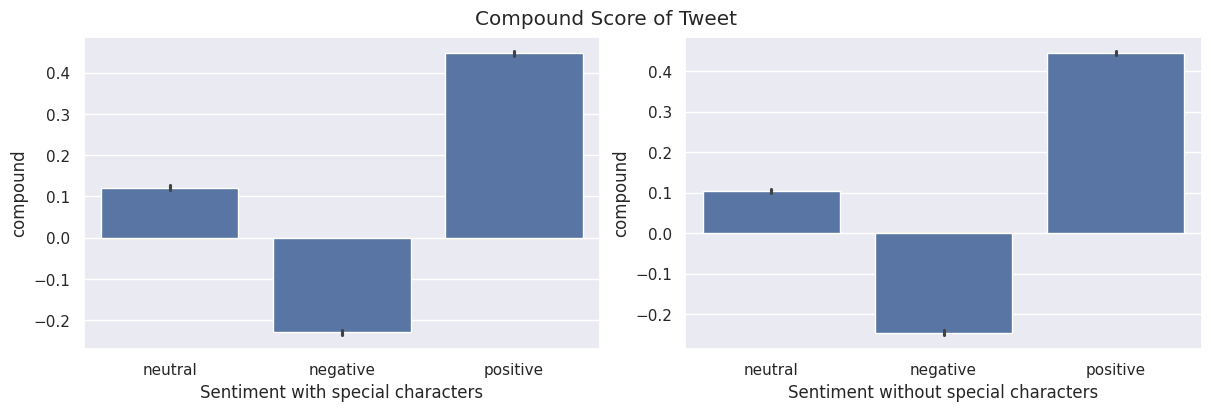

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4), constrained_layout=True)
sns.barplot(data=point, x="sentiment", y="compound",ax=axs[0])
axs[0].set_xlabel("Sentiment with special characters")

sns.barplot(data=point_, x="sentiment", y="compound",ax=axs[1])
axs[1].set_xlabel("Sentiment without special characters")

plt.suptitle("Compound Score of Tweet")
plt.show()

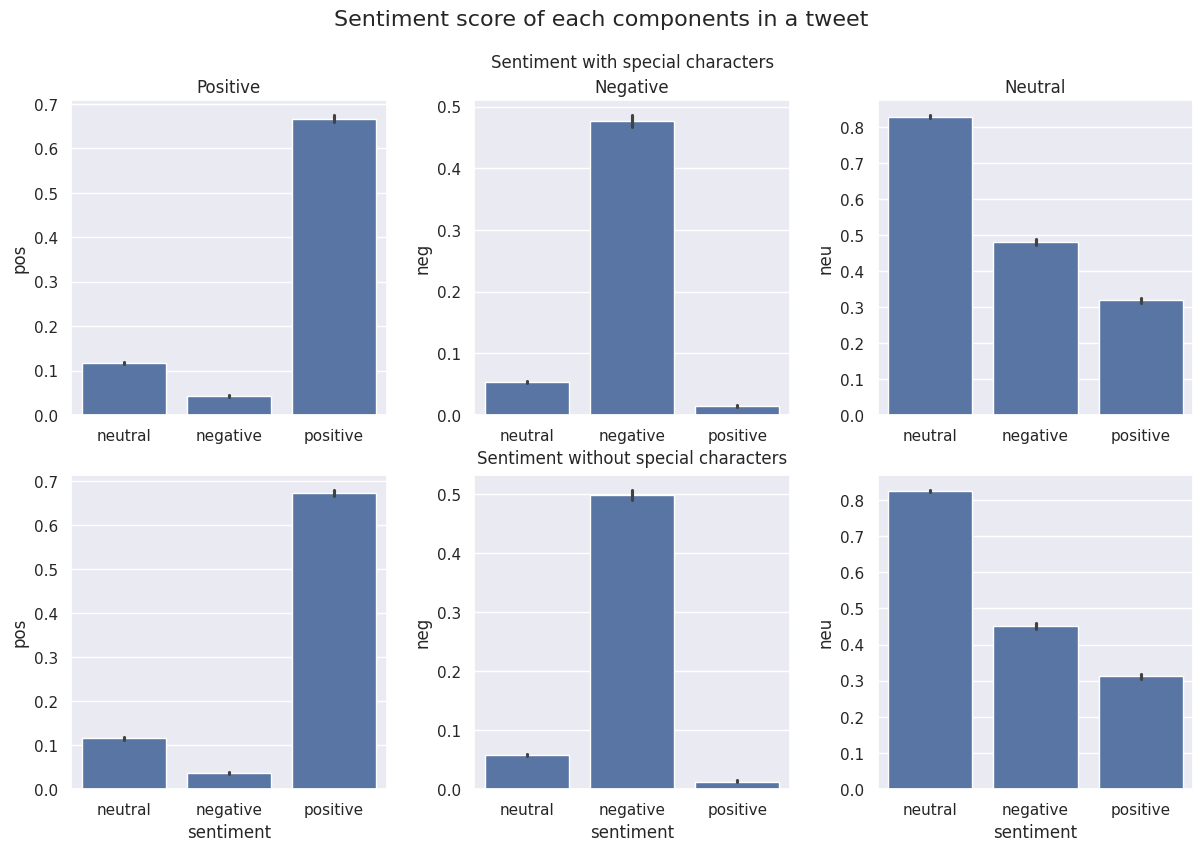

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

sns.barplot(data=point, x="sentiment", y="pos", ax=axs[0][0]).set(xlabel=None)
sns.barplot(data=point, x="sentiment", y="neg", ax=axs[0][1]).set(xlabel=None)
sns.barplot(data=point, x="sentiment", y="neu", ax=axs[0][2]).set(xlabel=None)

sns.barplot(data=point_, x="sentiment", y="pos", ax=axs[1][0])
sns.barplot(data=point_, x="sentiment", y="neg", ax=axs[1][1])
sns.barplot(data=point_, x="sentiment", y="neu", ax=axs[1][2])

axs[0][0].set_title('Positive')
axs[0][1].set_title('Negative')
axs[0][2].set_title('Neutral')

axs[0][1].text(0.5, 1.12, "Sentiment with special characters", ha='center', va='center', transform=axs[0][1].transAxes)
axs[1][1].text(0.5, 1.05, "Sentiment without special characters", ha='center', va='center', transform=axs[1][1].transAxes)

fig.tight_layout(pad=0.5)
plt.suptitle("Sentiment score of each components in a tweet",y=1.05,fontsize=16)
plt.show()

- Qua 2 biểu đồ trên, ta thấy phân phối cảm xúc (Sentiment Analysis) của văn bản không thực hiện xóa các ký tự đặc biệt và có thực hiện xóa các ký tự đặc biệt không có sự thay đổi lớn. Điều này cho thấy việc xóa các ký tự đặc biệt không ảnh hưởng nhiều đến cảm xúc trong văn bản của người dùng.

### 3. Future Engineering

#### 3.1. Normalization

In [ ]:
df['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [ ]:
df['sentiment'] = df['sentiment'].map({'neutral': 1, 'positive': 2, 'negative': 0})

Text(0.5, 1.0, 'Distribution of Sentiments')

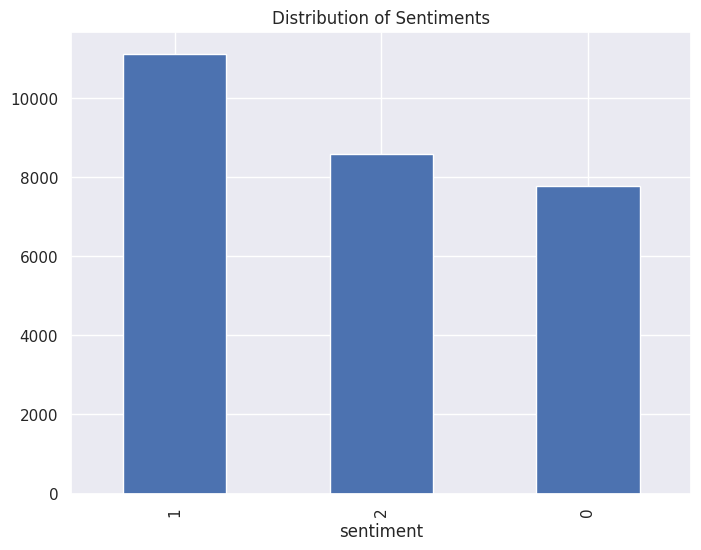

In [ ]:
plt.figure(figsize=(8,6))
df.sentiment.value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')

### 4. Modeling

#### 4.1. Multinomial Naive Bayes

In [ ]:
X = df['selected_text']
y = df['sentiment']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [ ]:
pipe = Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase = True,
                                                     stop_words = 'english',
                                                    analyzer = 'word')),

                 ('naive_bayes', MultinomialNB())])

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [ ]:
pipe.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

# Dự đoán trên tập kiểm tra
y_test_pred = pipe.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1184
           1       0.70      0.91      0.79      1686
           2       0.86      0.77      0.81      1252

    accuracy                           0.78      4122
   macro avg       0.81      0.76      0.77      4122
weighted avg       0.80      0.78      0.78      4122

              precision    recall  f1-score   support

           0       0.89      0.57      0.69      1154
           1       0.68      0.91      0.78      1685
           2       0.88      0.77      0.82      1284

    accuracy                           0.77      4123
   macro avg       0.81      0.75      0.76      4123
weighted avg       0.80      0.77      0.77      4123



#### 4.2. Bert Model

In [ ]:
from datasets import DatasetDict,Dataset
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report

##### 4.2.1. Pretrained Bert Model

- Mô hình pre-trained thường được huấn luyện trên các tập dữ liệu lớn và phức tạp, giúp cho việc train mô hình:
    - Tăng độ chính xác: Vì có thể học được nhiều đặc trưng từ dữ liệu đa dạng.
    - Tiết kiệm được thời gian: Việc huấn luyện một mô hình từ đầu có thể mất rất nhiều thời gian và tài nguyên.
    - Khả năng tái sử dụng: Các mô hình pre-trained có thể được sử dụng lại trong nhiều tác vụ khác nhau và không cần phải huấn luyện lại từ đầu.

- Pre-trained `distilbert-base-uncased` là một mô hình xử lý ngôn ngữ tự nhiên pre-trained được phát triển bởi Hugging Face. `DistilBERT` là một phiên bản nhỏ hơn và nhanh hơn của BERT, một mô hình học sâu nổi tiếng trong lĩnh vực xử lý ngôn ngữ tự nhiên.

- Mô hình `distilbert-base-uncased` bao gồm 12 lớp mạng và khoảng 66 triệu tham số. Nó được huấn luyện trên tập dữ liệu lớn và đa dạng, bao gồm tập dữ liệu tiếng Anh của Wikipedia và các tập dữ liệu ngôn ngữ tự nhiên khác.

In [ ]:
pre_trained_model = 'distilbert-base-uncased'

Sử dụng lớp `AutoTokenizer` từ thư viện Hugging Face Transformers chuyển đổi văn bản thành các token.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(pre_trained_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df=df[['selected_text','sentiment']]

In [ ]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)
df_valid,df_test=train_test_split(df_test,test_size=0.5,random_state=42)

In [ ]:
dataset=DatasetDict()
dataset['train']=Dataset.from_pandas(df_train)
dataset['validation']=Dataset.from_pandas(df_valid)
dataset['test']=Dataset.from_pandas(df_test)

Chuẩn hóa

In [ ]:
def tokenize_sentence(dataset):
    return tokenizer(dataset['selected_text'],truncation=True,max_length=160)

In [ ]:
tokenized_dataset=dataset.map(tokenize_sentence,batched=True)
tokenized_dataset

Map:   0%|          | 0/19236 [00:00<?, ? examples/s]

Map:   0%|          | 0/4122 [00:00<?, ? examples/s]

Map:   0%|          | 0/4123 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['selected_text', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 19236
    })
    validation: Dataset({
        features: ['selected_text', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 4122
    })
    test: Dataset({
        features: ['selected_text', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 4123
    })
})

In [ ]:
tokenized_dataset=tokenized_dataset.rename_column('sentiment','labels')

Tính toán trọng số cho hàm mất mát dữ liệu

In [ ]:
weights=(1-(df_train['sentiment'].value_counts().sort_index()/len(df_train))).values
weights

array([0.71704096, 0.59726554, 0.68569349])

In [ ]:
weights=torch.from_numpy(weights).float().to('cuda')

In [ ]:
class WeightedLossTrainer(Trainer):
    def compute_loss(self,model,inputs,return_outputs=False):


        outputs=model(**inputs)

        logits=outputs.get('logits')

        labels=inputs.get('labels')

        loss_func=nn.CrossEntropyLoss(weight=weights)
        loss=loss_func(logits,labels)
        return (loss,outputs) if return_outputs else loss

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(pre_trained_model,num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(pred):
    labels=pred.label_ids
    preds=pred.predictions.argmax(-1)
    f1=f1_score(labels,preds,average='weighted')
    return {"f1":f1}

In [ ]:
batch_size=64
logging_steps=100
output_dir='../Model_saved'

training_args=TrainingArguments(output_dir=output_dir,
                                num_train_epochs=10,
                                learning_rate=2e-5,
                                per_device_train_batch_size=batch_size,
                                per_device_eval_batch_size=batch_size,
                                weight_decay=0.01,
                                evaluation_strategy='epoch',
                                load_best_model_at_end=True,
                                logging_steps=logging_steps,
                                save_strategy = "epoch")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer=WeightedLossTrainer(model=model,
                            args=training_args,
                            compute_metrics=compute_metrics,
                            train_dataset=tokenized_dataset['train'],
                            eval_dataset=tokenized_dataset['validation'],
                            tokenizer=tokenizer)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.343500,0.341452,0.873958
2,0.268700,0.315058,0.889324
3,0.195400,0.333532,0.890511
4,0.144800,0.358658,0.891425
5,0.103500,0.410699,0.887883
6,0.075600,0.449827,0.888600
7,0.050100,0.483378,0.889119
8,0.050900,0.516951,0.885926
9,0.039100,0.530132,0.887857
10,0.040500,0.533684,0.889337


TrainOutput(global_step=3010, training_loss=0.1405707903775662, metrics={'train_runtime': 745.9427, 'train_samples_per_second': 257.875, 'train_steps_per_second': 4.035, 'total_flos': 2048216397352848.0, 'train_loss': 0.1405707903775662, 'epoch': 10.0})

In [ ]:
y_pred = trainer.predict(tokenized_dataset['test'])
y_logits = y_pred.predictions
y_probabilities = tf.nn.softmax(y_logits)
y_pred_labels = np.argmax(y_probabilities, axis=1)

In [ ]:
target_names = ['negative','neutral','positive']
print(classification_report(df_test['sentiment'], y_pred_labels))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1154
           1       0.87      0.91      0.89      1685
           2       0.91      0.91      0.91      1284

    accuracy                           0.89      4123
   macro avg       0.90      0.89      0.89      4123
weighted avg       0.89      0.89      0.89      4123



In [ ]:
trainer.save_model('/content/drive/MyDrive/HTK/Model')

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/HTK/dataset/test.csv')